In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로를 지정합니다.
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름을 가져옵니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트를 설정합니다.
rc('font', family=font_name)

In [2]:
culture_file_path = 'C:\Python Project\Seoul_Education_Data_Competition_2024\Excel\culture_elementary_scool_2014to2023.xlsx'
df = pd.read_excel(culture_file_path, engine='openpyxl', header=1)

df.head()

,학력별(1),시점,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,학력별(1),시점,계,계,계,계,계,계,계,계,...,계,계,계,계,계,계,계,계,계,계
1,초등학교,2014,6987,120,172,318,283,245,278,285,...,351,607,386,626,224,361,103,147,269,291
2,초등학교,2015,8514,133,205,309,325,267,319,354,...,463,853,476,808,276,465,107,181,297,311
3,초등학교,2016,10226,181,248,381,374,309,363,412,...,584,1042,586,1002,326,550,121,236,371,340
4,초등학교,2017,11033,149,281,388,392,377,385,463,...,565,1181,698,1139,384,634,140,221,387,336


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학력별(1)  11 non-null     object
 1   시점      11 non-null     object
 2   소계      11 non-null     object
 3   종로구     11 non-null     object
 4   중구      11 non-null     object
 5   용산구     11 non-null     object
 6   성동구     11 non-null     object
 7   광진구     11 non-null     object
 8   동대문구    11 non-null     object
 9   중랑구     11 non-null     object
 10  성북구     11 non-null     object
 11  강북구     11 non-null     object
 12  도봉구     11 non-null     object
 13  노원구     11 non-null     object
 14  은평구     11 non-null     object
 15  서대문구    11 non-null     object
 16  마포구     11 non-null     object
 17  양천구     11 non-null     object
 18  강서구     11 non-null     object
 19  구로구     11 non-null     object
 20  금천구     11 non-null     object
 21  영등포구    11 non-null     object
 22  동작구     11 non-null     obje

In [4]:
df_culture = df.iloc[1:, [1, 2]].astype('int64')
df_culture.set_index('시점', inplace=True)

df_culture.columns = ['다문화 학생 수']

df_culture.head()

,다문화 학생 수
시점,
2014,6987
2015,8514
2016,10226
2017,11033
2018,11940


In [5]:
school_file_path = 'C:\Python Project\Seoul_Education_Data_Competition_2024\Excel\elementary_school_2014to2023.xlsx'
df_school = pd.read_excel(school_file_path, engine='openpyxl', header=0)

df_school = df_school.iloc[:, 2:]
df_school.set_index("시점", inplace=True)

df_school.columns =['학급 수', '전체 학생 수', '입학생 수', '졸업생 수']

df_school.head()

,학급 수,전체 학생 수,입학생 수,졸업생 수
시점,,,,
2014,18854,457517,79656,88172
2015,18780,450675,75258,78066
2016,18621,436121,69944,79123
2017,18625,428333,72529,75440
2018,18585,424800,70686,67742


In [6]:
df_student = pd.concat([df_school['전체 학생 수'], df_culture], axis=1)
df_student['순수 한국인 학생 수'] = df_school['전체 학생 수'] - df_culture['다문화 학생 수']

df_student['다문화 학생 비율'] = round((df_student['다문화 학생 수'] / df_student['전체 학생 수']) * 100, 2)
df_student['순수 한국인 학생 비율'] = round((df_student['순수 한국인 학생 수'] / df_student['전체 학생 수']) * 100, 2)

df_student

,전체 학생 수,다문화 학생 수,순수 한국인 학생 수,다문화 학생 비율,순수 한국인 학생 비율
시점,,,,,
2014,457517,6987,450530,1.53,98.47
2015,450675,8514,442161,1.89,98.11
2016,436121,10226,425895,2.34,97.66
2017,428333,11033,417300,2.58,97.42
2018,424800,11940,412860,2.81,97.19
2019,422293,13067,409226,3.09,96.91
2020,409536,12938,396598,3.16,96.84
2021,399435,13093,386342,3.28,96.72
2022,393565,12779,380786,3.25,96.75


In [7]:
df_korea = df_student.iloc[:, [0, 2]]

df_korea

,전체 학생 수,순수 한국인 학생 수
시점,,
2014,457517,450530
2015,450675,442161
2016,436121,425895
2017,428333,417300
2018,424800,412860
2019,422293,409226
2020,409536,396598
2021,399435,386342
2022,393565,380786


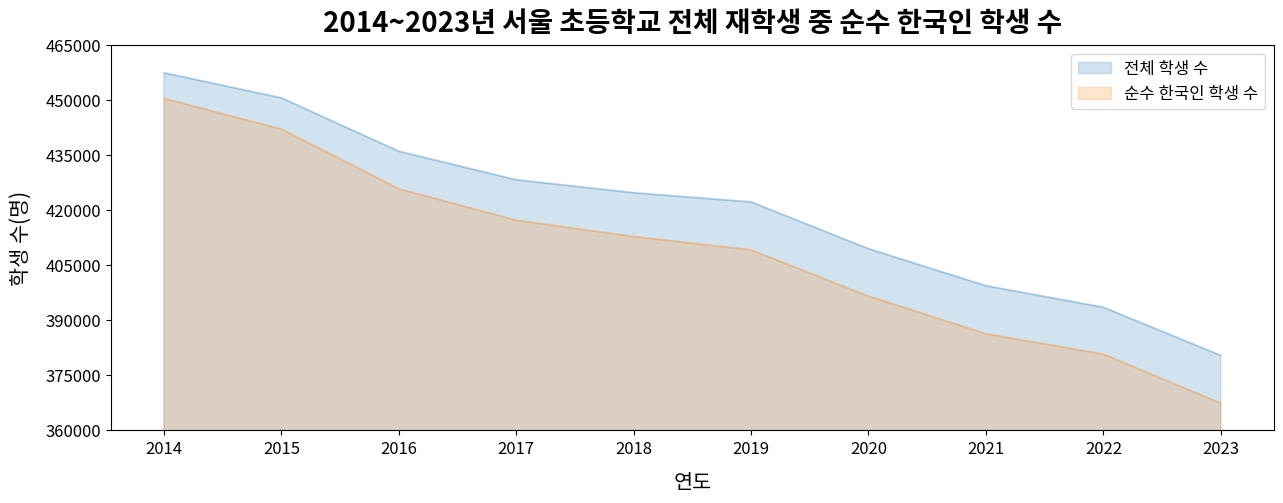

In [8]:
#면적 그래프
df_korea.plot(kind='area', stacked=False, alpha=0.2, figsize=(15,5))

plt.title("2014~2023년 서울 초등학교 전체 재학생 중 순수 한국인 학생 수", weight='bold', fontsize=20, pad=10)

plt.xlabel('연도', fontsize=15, labelpad=10)
plt.xticks(df_korea.index.to_list(), fontsize=12)
plt.ylabel('학생 수(명)', fontsize=15, labelpad=10)
plt.yticks(np.arange(360000, 465001, 15000), fontsize=12)   #y축 범위 설정
plt.ylim(360000, 465000)

plt.legend(loc='best', fontsize=12)

plt.show()

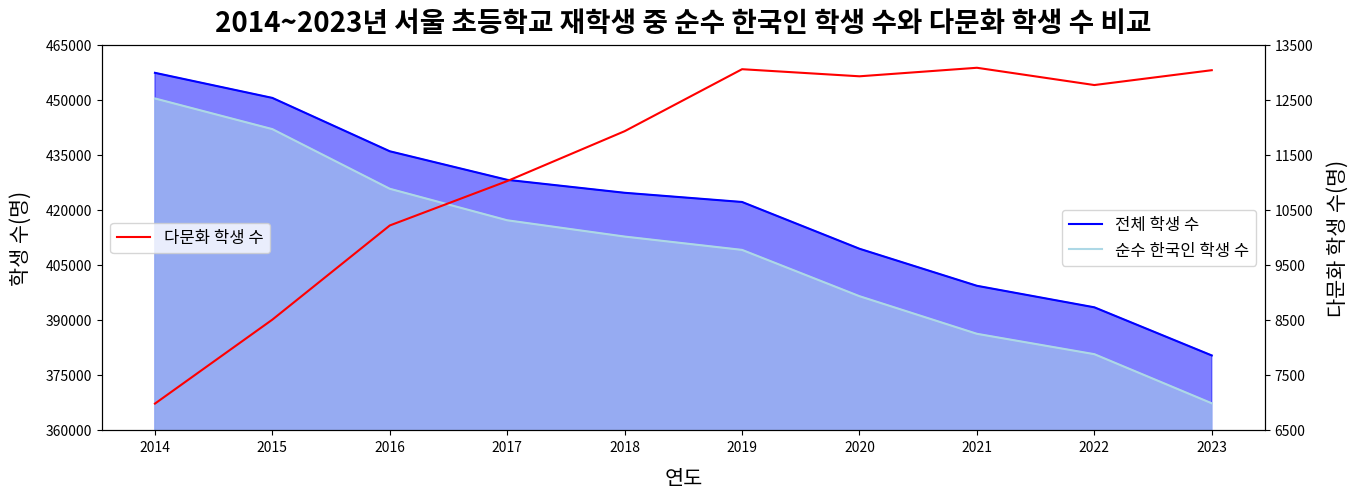

In [9]:
#이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(15,5))
x = df_korea.index.to_list()

#첫 번째 y축 선 그래프
ax1.plot(x, df_korea['전체 학생 수'], color='blue', label='전체 학생 수')
ax1.plot(x, df_korea['순수 한국인 학생 수'], color='lightblue', label='순수 한국인 학생 수')

#누적 그래프
ax1.fill_between(x, df_korea['전체 학생 수'], color='blue', alpha=0.5)
ax1.fill_between(x, df_korea['순수 한국인 학생 수'], color='lightblue', alpha=0.5)

ax1.set_xlabel('연도', fontsize=15, labelpad=10)
ax1.set_xticks(x)   #[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
ax1.set_ylabel('학생 수(명)', fontsize=15, labelpad=10)
ax1.set_ylim(360000, 465000)
ax1.set_yticks(np.arange(360000, 465001, 15000))

ax1.legend(loc='center right', fontsize=12)

# 두 번째 y축에 꺾은선 그래프
ax2 = ax1.twinx()
ax2.plot(x, df_culture, color='red', label='다문화 학생 수')
ax2.set_ylabel('다문화 학생 수(명)', fontsize=15, labelpad=10)
ax2.set_ylim(6500, 13500)
ax2.set_yticks(np.arange(6500, 13501, 1000))

ax2.legend(loc='center left', fontsize=12)

#전체 타이틀
plt.title('2014~2023년 서울 초등학교 재학생 중 순수 한국인 학생 수와 다문화 학생 수 비교', fontsize=20, pad=10, weight='bold')

plt.show()

In [10]:
df_region = df.copy().drop(df.columns[[0, 2]], axis=1).iloc[1:, :]

df_region.set_index('시점', inplace=True)

df_region = df_region.astype('int64')

df_region.info()
df_region.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2014 to 2023
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종로구     10 non-null     int64
 1   중구      10 non-null     int64
 2   용산구     10 non-null     int64
 3   성동구     10 non-null     int64
 4   광진구     10 non-null     int64
 5   동대문구    10 non-null     int64
 6   중랑구     10 non-null     int64
 7   성북구     10 non-null     int64
 8   강북구     10 non-null     int64
 9   도봉구     10 non-null     int64
 10  노원구     10 non-null     int64
 11  은평구     10 non-null     int64
 12  서대문구    10 non-null     int64
 13  마포구     10 non-null     int64
 14  양천구     10 non-null     int64
 15  강서구     10 non-null     int64
 16  구로구     10 non-null     int64
 17  금천구     10 non-null     int64
 18  영등포구    10 non-null     int64
 19  동작구     10 non-null     int64
 20  관악구     10 non-null     int64
 21  서초구     10 non-null     int64
 22  강남구     10 non-null     int64
 23  송파구     10 non-nu

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
시점,,,,,,,,,,,,,,,,,,,,,
2014,120,172,318,283,245,278,285,287,181,186,...,351,607,386,626,224,361,103,147,269,291
2015,133,205,309,325,267,319,354,354,230,235,...,463,853,476,808,276,465,107,181,297,311
2016,181,248,381,374,309,363,412,397,298,297,...,584,1042,586,1002,326,550,121,236,371,340
2017,149,281,388,392,377,385,463,430,282,324,...,565,1181,698,1139,384,634,140,221,387,336
2018,161,265,396,417,381,438,554,456,335,389,...,607,1295,813,1184,424,669,165,202,417,387


In [11]:
#행(시점)별 최댓값과 최솟값
max_per_row = df_region.max(axis=1) #최댓값
max_per_row_region = df_region.idxmax(axis=1)   #최댓값 자치구
min_per_row = df_region.min(axis=1) #최솟값
min_per_row_region = df_region.idxmin(axis=1)   #최솟값 자치구

#데이터프레임 생성
df_row = pd.DataFrame({
    '최댓값': max_per_row,
    '최댓값_자치구': max_per_row_region,
    '최솟값': min_per_row,
    '최솟값_자치구': min_per_row_region
})

#열(자치구)별 최댓값
max_per_column = df_region.max()    #최댓값
max_per_column_idx = df_region.idxmax() #최댓값 시점
min_per_column = df_region.min()    #최솟값
min_per_column_idx = df_region.idxmin() #최솟값 시점

#데이터프레임 생성
df_column = pd.DataFrame({
    '최댓값': max_per_column,
    '최댓값_시점': max_per_column_idx,
    '최솟값': min_per_column,
    '최솟값_시점': min_per_column_idx
})


In [12]:
df_row  #행(시점)별 최댓값과 최솟값

,최댓값,최댓값_자치구,최솟값,최솟값_자치구
시점,,,,
2014,626,영등포구,103,서초구
2015,853,구로구,107,서초구
2016,1042,구로구,121,서초구
2017,1181,구로구,140,서초구
2018,1295,구로구,161,종로구
2019,1463,구로구,166,서초구
2020,1448,구로구,162,종로구
2021,1477,구로구,157,종로구
2022,1440,구로구,163,종로구


In [13]:
df_column  #열(자치구)별 최댓값과 최솟값

,최댓값,최댓값_시점,최솟값,최솟값_시점
종로구,181,2016,120,2014
중구,281,2017,172,2014
용산구,408,2022,309,2015
성동구,470,2019,283,2014
광진구,542,2023,245,2014
동대문구,517,2020,278,2014
중랑구,596,2020,285,2014
성북구,564,2021,287,2014
강북구,408,2021,181,2014
도봉구,425,2023,186,2014


In [14]:
df_column.describe()

,최댓값,최솟값
count,25.00000,25.000000
mean,552.36000,279.120000
std,320.61125,125.130039
min,176.00000,103.000000
25%,408.00000,186.000000
50%,489.00000,276.000000
75%,596.00000,309.000000
max,1535.00000,626.000000


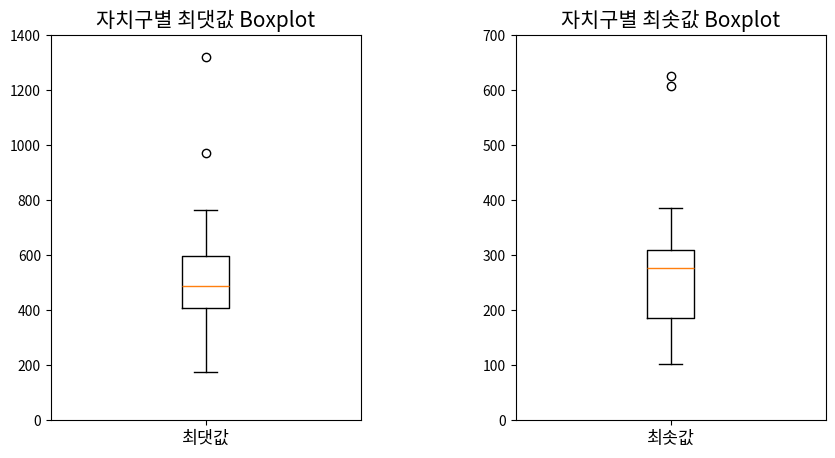

In [15]:
# 박스플롯 그리기
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# 최댓값 박스플롯
axes[0].boxplot(df_column['최댓값'])
axes[0].set_title('자치구별 최댓값 Boxplot', fontsize=15)
axes[0].set_xticklabels(['최댓값'], fontsize=12.5)
axes[0].set_ylim(0, 1400)

# 최솟값 박스플롯
axes[1].boxplot(df_column['최솟값'])
axes[1].set_title('자치구별 최솟값 Boxplot', fontsize=15)
axes[1].set_xticklabels(['최솟값'], fontsize=12.5)
axes[1].set_ylim(0, 700)

# 서브플롯 사이 간격 조정
plt.subplots_adjust(wspace=0.5)  # 간격을 적절히 조정

plt.show()

위 코드로 생성된 두 개의 박스플롯은 각각 '최댓값'과 '최솟값'에 대한 시각화입니다.

1. **최댓값 Boxplot**:
   - 이 그래프는 각 지역의 최댓값을 나타내는 데이터의 분포를 시각화한 것입니다.
   - 박스플롯의 박스 부분은 데이터의 중간값과 분포의 중앙 50%인 사분위수(Q1 ~ Q3)를 나타냅니다. 상자의 아래쪽 가장자리는 Q1이고 위쪽 가장자리는 Q3입니다. 상자 내부의 가로선은 데이터의 중간값을 나타냅니다.
   - 그래프에서 박스의 위와 아래에 있는 선은 최댓값과 최솟값을 나타냅니다. 그래프의 바깥쪽에 있는 점은 이상치(outlier)를 나타냅니다.
   - 각 박스플롯에는 '최댓값'에 해당하는 데이터만을 사용하여 그림.

2. **최솟값 Boxplot**:
   - 이 그래프는 각 지역의 최솟값을 나타내는 데이터의 분포를 시각화한 것입니다.
   - 박스플롯의 설명은 위의 최댓값 Boxplot과 유사합니다. 하지만 이 그래프는 최솟값에 대한 정보를 보여줍니다.
   - 각 박스플롯에는 '최솟값'에 해당하는 데이터만을 사용하여 그림.
   
두 그래프를 비교함으로써 각 지역의 최댓값과 최솟값의 분포를 확인할 수 있습니다. 만약 두 값 사이의 차이가 크다면, 해당 지역의 데이터가 다양한 범위에 분포되어 있음을 의미할 수 있습니다. 반대로 차이가 적다면, 해당 지역의 데이터가 비교적 일정한 범위에 집중되어 있음을 의미할 수 있습니다.

In [16]:
df_row

,최댓값,최댓값_자치구,최솟값,최솟값_자치구
시점,,,,
2014,626,영등포구,103,서초구
2015,853,구로구,107,서초구
2016,1042,구로구,121,서초구
2017,1181,구로구,140,서초구
2018,1295,구로구,161,종로구
2019,1463,구로구,166,서초구
2020,1448,구로구,162,종로구
2021,1477,구로구,157,종로구
2022,1440,구로구,163,종로구


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# 랜덤 시드 설정
np.random.seed(42)

# ARIMA 모델 생성 및 훈련
model = ARIMA(df_row['최댓값'], order=(5,1,0))
model_fit = model.fit()

# 20년 후까지의 예측을 수행합니다.
future_years = range(2024, 2044)
forecast = model_fit.forecast(steps=len(future_years))

# 예측 결과를 데이터프레임으로 변환합니다.
df_forecast_max = pd.DataFrame({
    '년도': future_years,
    '학생 수': forecast.round(2)
})
# 예측된 최댓값 자치구 설정
# 이 부분은 예측 모델을 통해 얻은 값으로 변경할 수 있습니다.
df_forecast_max['자치구'] = '구로구' # 예시로 '구로구'를 사용

df_forecast_max.set_index('년도', inplace=True)

df_forecast_max

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,학생 수,자치구
년도,,
2024,1398.75,구로구
2025,1390.25,구로구
2026,1325.69,구로구
2027,1320.78,구로구
2028,1138.15,구로구
2029,1165.91,구로구
2030,1086.98,구로구
2031,1057.18,구로구
2032,951.75,구로구


이 코드는 ARIMA(자동 회귀 이동 평균) 모델을 사용하여 시계열 데이터를 분석하는 작업을 수행합니다.

여기서 `ARIMA`는 시계열 데이터의 특성을 분석하고 예측하기 위한 모델입니다. 이 모델은 현재 값이 이전 값의 선형 조합 및 이전 예측 오차의 선형 조합으로 예측된다는 가정을 기반으로 합니다.

이 코드에서는 다음과 같은 작업이 수행됩니다:

1. `ARIMA` 모델을 생성합니다. 이 때, 함수의 첫 번째 인자로는 시계열 데이터가 들어가며, 여기서는 `df_row_max['최댓값']`가 해당됩니다. 이 데이터는 시간에 따른 최댓값을 포함하는 시계열 데이터입니다.

2. `order` 매개변수는 ARIMA 모델의(p, d, q) 값으로, p는 자기 회귀 모형(AR)의 차수, d는 차분(Differencing)의 차수, q는 이동 평균 모형(MA)의 차수를 나타냅니다. 여기서는 (5,1,0)으로 설정되어 있어서 자기 회귀 모형의 차수는 5이며, 차분의 차수는 1이고 이동 평균 모형의 차수는 0입니다. 

3. `model.fit()`은 ARIMA 모델을 시계열 데이터에 맞추기 위해 훈련하는 과정을 수행합니다. 이 과정에서는 모델이 주어진 데이터에 최적화되도록 매개변수를 조정합니다. 

결과적으로, `model_fit` 객체에는 훈련된 ARIMA 모델이 포함되어 있으며, 이 모델을 사용하여 예측을 수행할 수 있습니다.

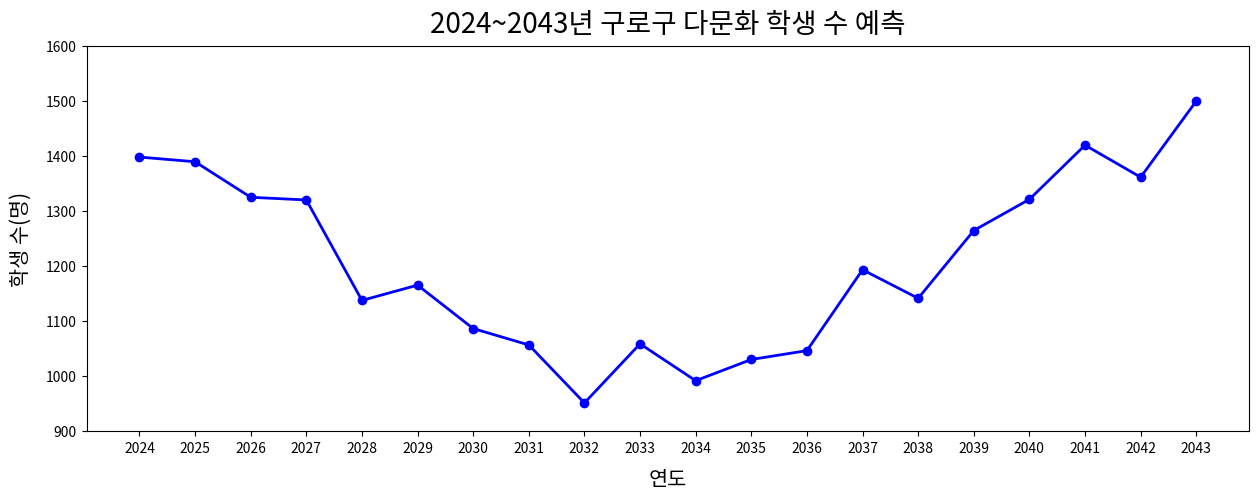

In [18]:
# 그래프를 그릴 데이터 추출
x = [str(year) for year in df_forecast_max.index]
y = df_forecast_max['학생 수']

# 그래프 생성
plt.figure(figsize=(15,5))
plt.plot(x, y, marker='o', color='b', linestyle='-', linewidth=2)

# 그래프 제목과 축 라벨 설정
plt.title('2024~2043년 구로구 다문화 학생 수 예측', fontsize=20, pad=10)
plt.xlabel('연도', fontsize=15, labelpad=10)
plt.ylabel('학생 수(명)', fontsize=15, labelpad=10)
plt.ylim(900, 1600) #y축 범위

# 그래프 출력
plt.show()
